<html>
    <h1> Supervised Learning Logistic Regression Multinomial
        </h1>
        <p> <b> Min Khant Soe</b> </p>
        <p> ID: 122277 </p>
        <p> ^_^ </p>
    </html>

<html>
<p>
    </p>
<p>1. With the iris data given in class, implement train_test_split from scratch.
</p>
</html>

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

# prepare
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

#feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Train_test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#add intercept to X
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis = 1)
intercept = np.ones((X_test.shape[0],1))
X_test = np.concatenate((intercept, X_test), axis = 1)

k = len(set(y))
m = X_train.shape[0]
n = X_train.shape[1]
y_train_encoded = np.zeros((m,k))
for each_class in range(k):
    cond = y_train == each_class
    y_train_encoded[np.where(cond), each_class] = 1


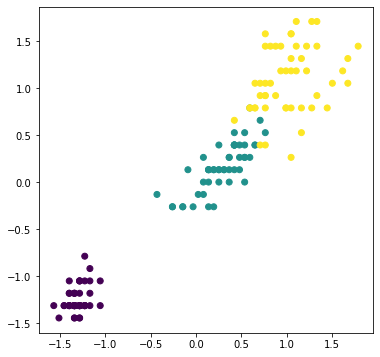

In [193]:
#visualize the data
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

<html>
<p>
    </p>
<p> 2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".
</p>
    <p> </p>
    <p> 3. Calculate time taken to fit your models using different training methods. </p>
</html>

In [194]:
#fit data

class LogisticRegression:

    def __init__(self, X, Y, k, n, method, max_iter = 1000, l_rate = 0.01):
        self.X = X
        self.Y = Y
        self.k = k
        self.n = n
        self.max_iter = max_iter
        self.method = method
        self.l_rate = l_rate
        self.loss = []
        self.W = np.random.rand(self.n,self.k)
        import time
        
        if self.method == 'Batch':
            start_time = time.time()
            for i in range(max_iter):
                cost, grad = self.gradient(self.X, self.Y)
                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                self.W = self.W - self.l_rate * grad
                self.loss.append(cost)
            print(f"time taken: {time.time() - start_time}")  
            
        elif self.method == 'Minibatch':
            start_time = time.time()
            batch_size = int(0.1 * self.X.shape[0])
            for i in range(self.max_iter):

                ix = np.random.randint(0, self.X.shape[0]) #<----with replacement
                batch_X = self.X[ix:ix+batch_size]
                batch_Y = self.Y[ix:ix+batch_size]

                cost, grad = self.gradient(batch_X, batch_Y)

                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                self.W = self.W - self.l_rate * grad
                self.loss.append(cost)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == 'Sto':
            start_time = time.time()
            used_ix = []
            
            for i in range(self.max_iter):
                idx = np.random.randint(self.X.shape[0])
                
                while i in used_ix:
                    idx = np.random.randint(self.X.shape[0])
                    
                X_train = self.X[idx,:].reshape(1,-1)
                Y_train = Y[idx]
                cost, grad = self.gradient(X_train, Y_train)

                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                self.W = self.W - self.l_rate * grad
                self.loss.append(cost)
                
                used_ix.append(i)
                if len(used_ix) == X.shape[0]:
                    used_ix = []
            print(f"time taken: {time.time() - start_time}")
        else:
            raise ValueError('Method input error: use one of the following methods: "Batch", "Minibatch, "Sto"')
                
            

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X)
        cost = - np.sum(Y * np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return cost, grad

    def h_theta (self, X):
        return self.softmax(X @  self.W)

    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x), axis = 1, keepdims= True)

    def softmax_grad(self, X, error):
        return X.T @ error
    
    def yhat(self, X_test):
        return np.argmax(self.h_theta(X_test), axis = 1)
    
    def plot(self):
        plt.plot(np.arange(len(self.loss)), self.loss, color = 'Orange', label = 'Training Losses')
        plt.title("The plot of training losses as number of iters increases.")
        plt.xlabel("Epoch")
        plt.ylabel("Losses")
        plt.legend()

In [195]:
model = LogisticRegression(X_train, y_train_encoded, k, X_train.shape[1], 'Batch', 10000, 0.01 )

Cost at iteration 0 1.440617818071419
Cost at iteration 500 0.07592931158377404
Cost at iteration 1000 0.06552079741025167
Cost at iteration 1500 0.061595509143610325
Cost at iteration 2000 0.05957322749821221
Cost at iteration 2500 0.05836553807165462
Cost at iteration 3000 0.0575782075216117
Cost at iteration 3500 0.05703401392931915
Cost at iteration 4000 0.05664175213864285
Cost at iteration 4500 0.05634988878781611
Cost at iteration 5000 0.0561272391564347
Cost at iteration 5500 0.05595391433126825
Cost at iteration 6000 0.0558166917748179
Cost at iteration 6500 0.0557064802467585
Cost at iteration 7000 0.05561685302779941
Cost at iteration 7500 0.05554315993367463
Cost at iteration 8000 0.05548196894480403
Cost at iteration 8500 0.05543070359819191
Cost at iteration 9000 0.05538740088877757
Cost at iteration 9500 0.05535054568969511
time taken: 0.20378375053405762


In [196]:
yhat_check = np.argmax(model.h_theta(X_test), axis = 1)
yhat

array([2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0,
       1], dtype=int64)

In [197]:
yhat = model.yhat(X_test)
yhat

array([2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       0], dtype=int64)

In [198]:
print(y_test.shape, yhat.shape)

(45,) (45,)


In [199]:
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.89      0.89         9
           2       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [200]:
print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes = [0,1,2])
yhat_binarized = label_binarize(yhat, classes= [0,1,2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:,i])
    print(f"Class {i} score: {class_score}")
    

=========Average precision score=======
Class 0 score: 1.0
Class 1 score: 0.8123456790123457
Class 2 score: 0.9247222222222222


<html>
<p> </p> 
<p> 4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses. </p>
    <p> 5. Simply, use classification_report from sklearn.metrics to evaluate your models.
    </p>
</html>

Cost at iteration 0 1.3513031580160666
Cost at iteration 500 0.07569629886794492
Cost at iteration 1000 0.06543978751657815
Cost at iteration 1500 0.06155555739728503
Cost at iteration 2000 0.059549658082169
Cost at iteration 2500 0.058350124600169535
Cost at iteration 3000 0.05756743869641806
Cost at iteration 3500 0.0570261363887164
Cost at iteration 4000 0.05663579167673476
Cost at iteration 4500 0.05634526069231451
time taken: 0.10405659675598145

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.89      0.89         9
           2       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


=========Average precision score=======
Class 0 score: 1.0
Class 1 score: 0.8123456790123457
Class 2 score: 0.92472

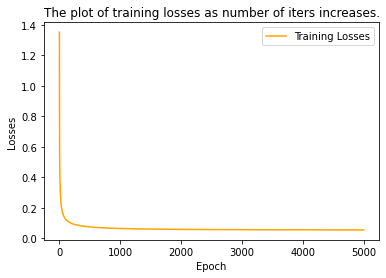

In [201]:
#Batch
model = LogisticRegression(X_train, y_train_encoded, k, X_train.shape[1], 'Batch', 5000, 0.01 )
yhat = model.yhat(X_test)

print("\n=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

print("\n=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes = [0,1,2])
yhat_binarized = label_binarize(yhat, classes= [0,1,2])
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:,i])
    print(f"Class {i} score: {class_score}")
    
model.plot()

Cost at iteration 0 1.5285338983797376
Cost at iteration 500 0.1658481891945532
Cost at iteration 1000 0.1869441555517627
Cost at iteration 1500 0.03461157526341816
Cost at iteration 2000 0.08046842556349941
Cost at iteration 2500 0.03277014362563423
Cost at iteration 3000 0.05156747792613074
Cost at iteration 3500 0.01727467883809084
Cost at iteration 4000 0.09905028000232409
Cost at iteration 4500 0.04728518222571964
time taken: 0.08571290969848633

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.89      0.89         9
           2       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


=========Average precision score=======
Class 0 score: 1.0
Class 1 score: 0.8123456790123457
Class 2 score: 0.92472

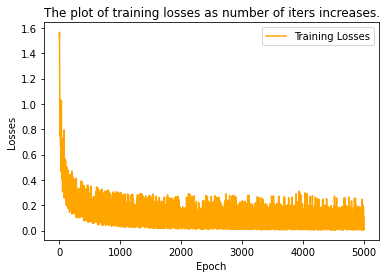

In [202]:
#Minibatch
model = LogisticRegression(X_train, y_train_encoded, k, X_train.shape[1], 'Minibatch', 5000, 0.01 )
yhat = model.yhat(X_test)

print("\n=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

print("\n=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes = [0,1,2])
yhat_binarized = label_binarize(yhat, classes= [0,1,2])
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:,i])
    print(f"Class {i} score: {class_score}")
    
model.plot()

Cost at iteration 0 1.3227046201705006
Cost at iteration 500 0.8828369468239925
Cost at iteration 1000 0.5275706384043561
Cost at iteration 1500 0.4653047906264129
Cost at iteration 2000 0.4054468647339275
Cost at iteration 2500 0.3817590243909489
Cost at iteration 3000 0.03835989679501729
Cost at iteration 3500 0.35302293997953244
Cost at iteration 4000 0.9987488516540044
Cost at iteration 4500 0.03998041883082414
time taken: 0.08870315551757812

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.89      0.89         9
           2       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


=========Average precision score=======
Class 0 score: 1.0
Class 1 score: 0.8123456790123457
Class 2 score: 0.924722222

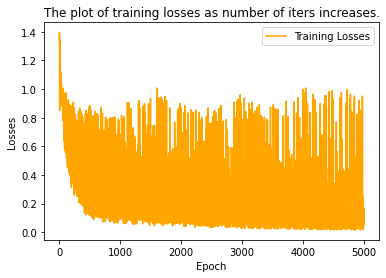

In [203]:
#sto
model = LogisticRegression(X_train, y_train_encoded, k, X_train.shape[1], 'Sto', 5000, 0.01 )
yhat = model.yhat(X_test)

print("\n=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

print("\n=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes = [0,1,2])
yhat_binarized = label_binarize(yhat, classes= [0,1,2])
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:,i])
    print(f"Class {i} score: {class_score}")

model.plot()

In [204]:
#not from the method in class
#Minibatch
model = LogisticRegression(X_train, y_train_encoded, k, X_train.shape[1], 'minibatch', 5000, 0.01 )


ValueError: Method input error: use one of the following methods: "Batch", "Minibatch, "Sto"

<html>
<p>
    </p>
<p> 6. Discuss your results ie. training losses of the three methods and time taken to fit models.
</p>
</html>

<html>
<p>
    </p>
<p> 6. 
</p>
    <p> The training losses in Batch is the lowest, and in Sto is the highest. The training losses in Minibatch is 2nd highest among in three methods.
    </p>
    <p> Time taken of batch method is the longest while that of minibatch and sto are similar. In my result, time taken in minimatch is slighly faster than in sto.
    </p>
</html>